In [1]:
# !!!!!Import rest of the libraries required
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


# Load the Diamonds dataset from Seaborn
diamonds_data = sns.load_dataset("diamonds")
diamonds_data.head(5)





,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# calculate the mean of the price by cut
mean_price_by_cut = diamonds_data.groupby('cut')['price'].mean()
mean_price_by_cut

cut
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Good         3928.864452
Fair         4358.757764
Name: price, dtype: float64

In [4]:
# calculate the standard deviation of the price by cut
std_price_by_cut = diamonds_data.groupby('cut')['price'].std()
std_price_by_cut

cut
Ideal        3808.401172
Premium      4349.204961
Very Good    3935.862161
Good         3681.589584
Fair         3560.386612
Name: price, dtype: float64

In [7]:
# calculate the mode of the price by cut
mode_price_by_cut = diamonds_data.groupby('cut')['price'].apply(lambda x: x.mode())
mode_price_by_cut

cut         
Ideal      0     828
Premium    0     802
Very Good  0     552
Good       0     544
Fair       0    2167
           1    2376
           2    2964
           3    3205
           4    4368
           5    4704
Name: price, dtype: int64

In [9]:
# calculate the variance of the price by cut
var_price_by_cut = diamonds_data.groupby('cut')['price'].var()
var_price_by_cut


cut
Ideal        1.450392e+07
Premium      1.891558e+07
Very Good    1.549101e+07
Good         1.355410e+07
Fair         1.267635e+07
Name: price, dtype: float64

In [10]:
# calculate the 25 and 75 percentile of the price by cut
percentiles_price_by_cut = diamonds_data.groupby('cut')['price'].quantile([0.25, 0.75])
percentiles_price_by_cut

cut            
Ideal      0.25     878.00
           0.75    4678.50
Premium    0.25    1046.00
           0.75    6296.00
Very Good  0.25     912.00
           0.75    5372.75
Good       0.25    1145.00
           0.75    5028.00
Fair       0.25    2050.25
           0.75    5205.50
Name: price, dtype: float64

<Axes: xlabel='cut', ylabel='price'>

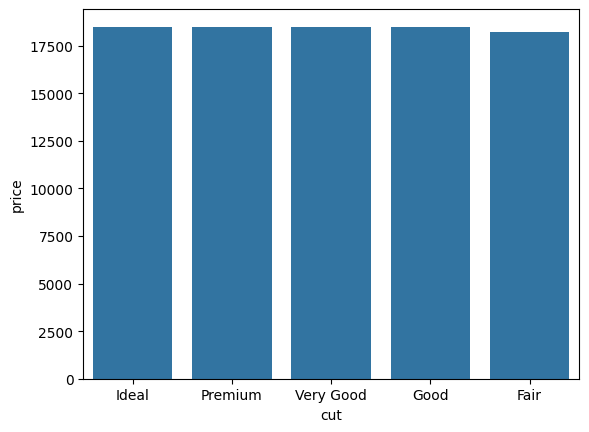

In [13]:
# calculate the range of the price by cut
range_price_by_cut = diamonds_data.groupby('cut')['price'].apply(lambda x: x.max() - x.min()).reset_index()
range_price_by_cut
sns.barplot(data=range_price_by_cut, x='cut', y='price')

In [8]:
# calculate the median of the price by cut
median_price_by_cut = diamonds_data.groupby('cut')['price'].median()
print ('median_price_by_cut')













# bonus 2 if you have a lot of time:
# make a function on your own that calculates the standard deviation of a list of numbers (you can find the formula in last weeks slides)

median_price_by_cut


In [15]:
# bonus 1:
# is there a correlation between the price and the carat? If so, what kind of correlation is it?
# what about covariance?
correlation = diamonds_data['carat'].corr(diamonds_data['price'])
covariance = diamonds_data['carat'].cov(diamonds_data['price'])

print("Correlation coefficient:", correlation)
print("Covariance:", covariance)

Correlation coefficient: 0.9215913011934771
Covariance: 1742.7653642651187


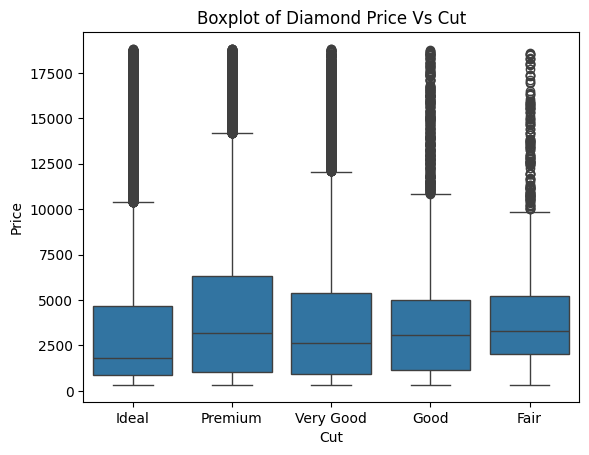

In [16]:
# 1. Boxplot of Diamond Price Vs Cut
sns.boxplot(data=diamonds_data, x='cut', y='price')
plt.title('Boxplot of Diamond Price Vs Cut')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.show()


<ipython-input-17-c9db4d26b068>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=diamonds_data, x='color', y='price', ci=None)  # ci=None removes error bars


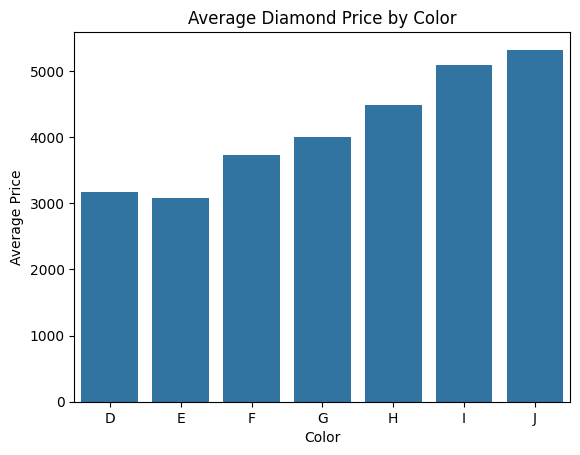

In [17]:
# 2. Barplot: Average Diamond Price by Color
sns.barplot(data=diamonds_data, x='color', y='price', ci=None)  # ci=None removes error bars
plt.title('Average Diamond Price by Color')
plt.xlabel('Color')
plt.ylabel('Average Price')
plt.show()

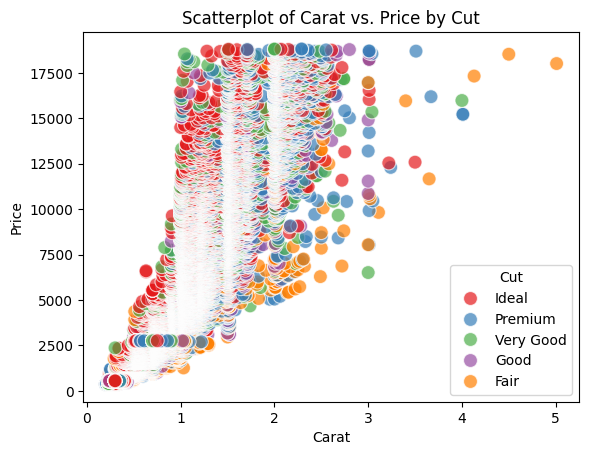

In [19]:
# 3. Scatterplot with Facets: Scatterplot of Carat vs. Price by Cut"
sns.scatterplot(data=diamonds_data, x='carat', y='price', hue='cut', palette='Set1', s=100, alpha=0.7)
plt.title('Scatterplot of Carat vs. Price by Cut')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend(title='Cut')
plt.show()


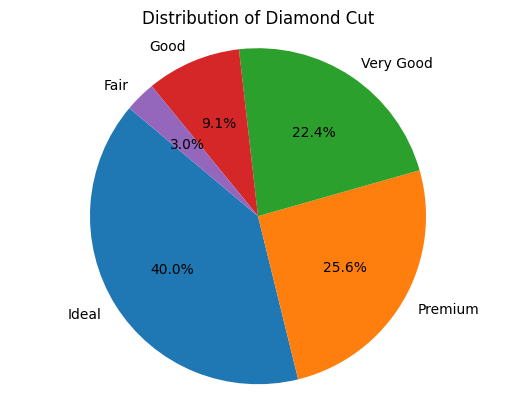

In [23]:
# 4. Pie Chart: Distribution of Diamond Cut
cut_counts = diamonds_data['cut'].value_counts()
plt.pie(cut_counts, labels=cut_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Diamond Cut')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


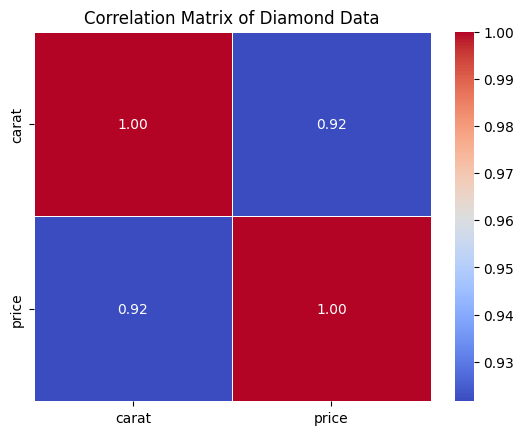

In [27]:
# Create a correlation matrix
selected_columns = ['carat', 'price']

correlation_matrix = diamonds_data[selected_columns].corr()

# Create a correlation plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Diamond Data')
plt.show()